# Fitted (cross-) semivariograms and (cross-) covariograms in different seasons

## Findings:

- SD leaves fewer outliers than MAD and results in SIF sills closer to unity
- Fitted semivariograms are in good agreement with empirical semivariograms across the board
- Fitted covariograms (i.e., transformed semivariogram fit) are bias high with respect to empirical covariograms
    - That said, empirical covariograms still become slightly negative for larger lags, so there could be bias in their calculation or the data
- Fitted cross-semivariograms behave poorly, especially in non-summer months

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../src")

In [7]:
import numpy as np
import xarray as xr

import fields
import model
import plot

%matplotlib inline

## Read data and setup analysis

In [8]:
ds = xr.open_dataset("../data/exp_pro/OCO2_MODIS_4x5deg_monthly_conus_augmented.nc")
ds = ds.where(ds.time.dt.year > 2014, drop=True)

# Format as multi-fields
ds_xco2 = ds[["xco2", "xco2_var"]]
ds_sif = ds[["sif", "sif_var", "evi"]]

var_names = ["xco2", "sif"]
cross_name = "xco2:sif"


In [9]:
# Analysis variables
timedelta = -1
n_bins = 30
max_dist = 1500
fast_dist = True

# param_guess = [sigma1, nu1, ell1, tau1, nu12, ell12, rho12, sigma2, nu2, ell2, tau2]
params_guess = [1.0, 1.5, 700, 0.0, 1.5, 700, -0.4, 1.0, 1.5, 700, 0.0]


In [5]:
def analyze_timestamp(timestamp):
    # Initialize Matern model
    k1 = cov_model.Matern()
    k2 = cov_model.Matern()

    # Setup multi-field object
    mf = fields.MultiField(
        ds_xco2, ds_sif, timestamp, timedelta=timedelta, fast_dist=fast_dist
    )
    model = cov_model.BivariateMatern(mf, k1, k2)
    plot.plot_fields(mf)

    # Compute empirical variograms, then fit
    vario_res, covario_res, params_fit = model.empirical_variograms(
        params_guess, n_bins=n_bins, max_dist=max_dist,
    )
    plot.plot_variograms(vario_res, timestamp, timedelta, params=params_fit)
    plot.plot_variograms(
        covario_res,
        timestamp,
        timedelta,
        params=params_fit,
        type_lab="Covariogram",
        scale_lab="Covariance",
    )


def analyze_month(month: int):
    """Run `analyze_timestamp` for the given month in 2016, 2018, and 2020"""
    if month < 10:
        timestamps = [f"{y}-0{month}-01" for y in [2016, 2018, 2020]]
    else:
        timestamps = [f"{y}-{month}-01" for y in [2016, 2018, 2020]]
    for timestamp in timestamps:
        print(f"Month: {timestamp}")
        analyze_timestamp(np.datetime64(timestamp))


## Winter / Early Spring
---

Month: 2016-03-01
Month: 2018-03-01
Month: 2020-03-01


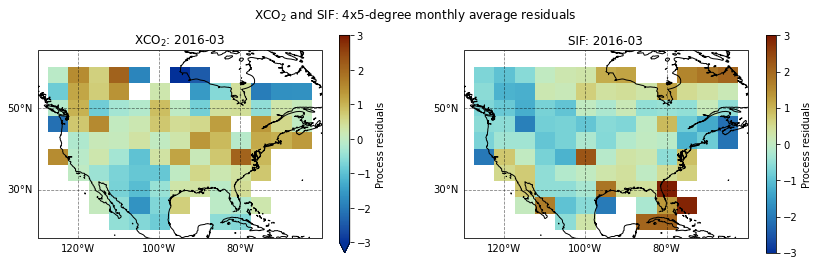

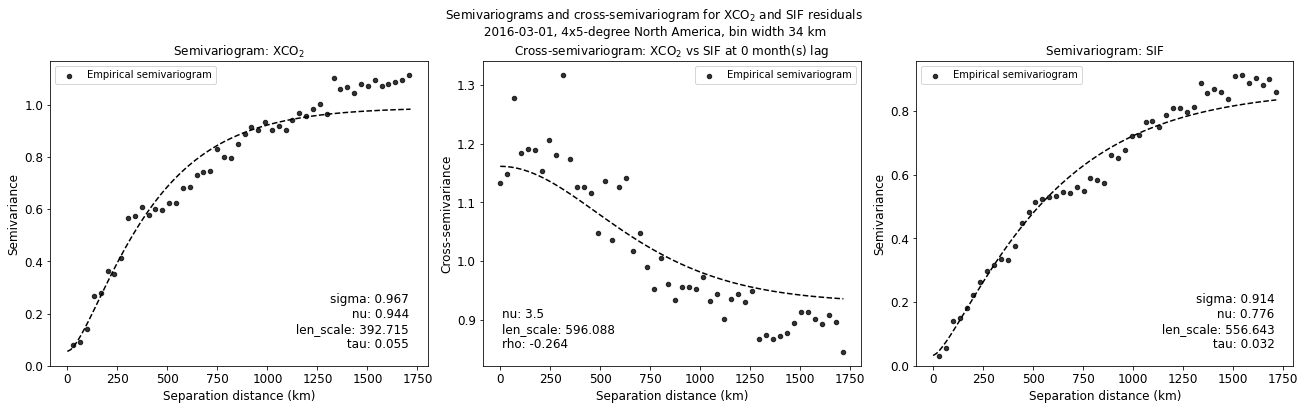

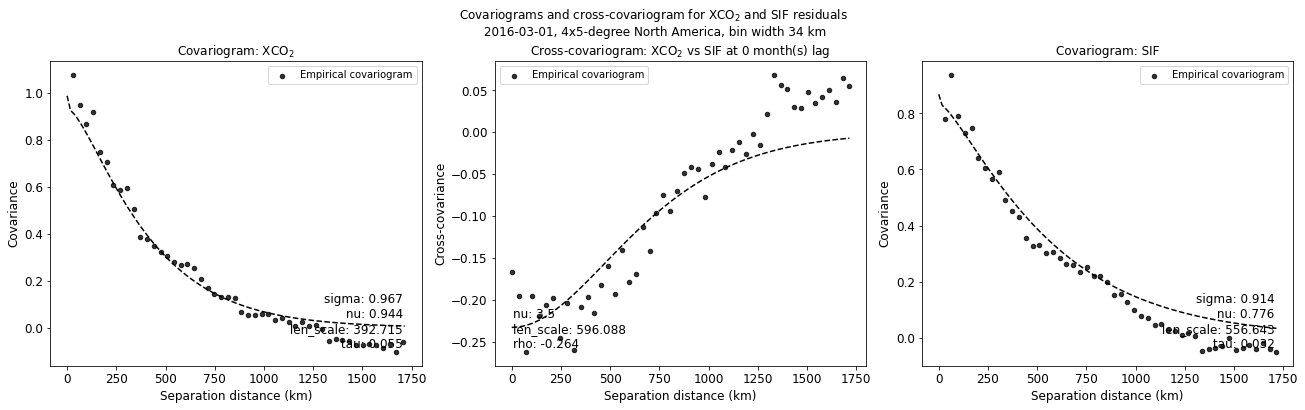

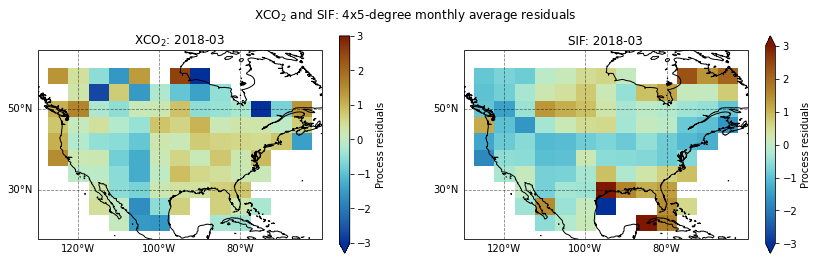

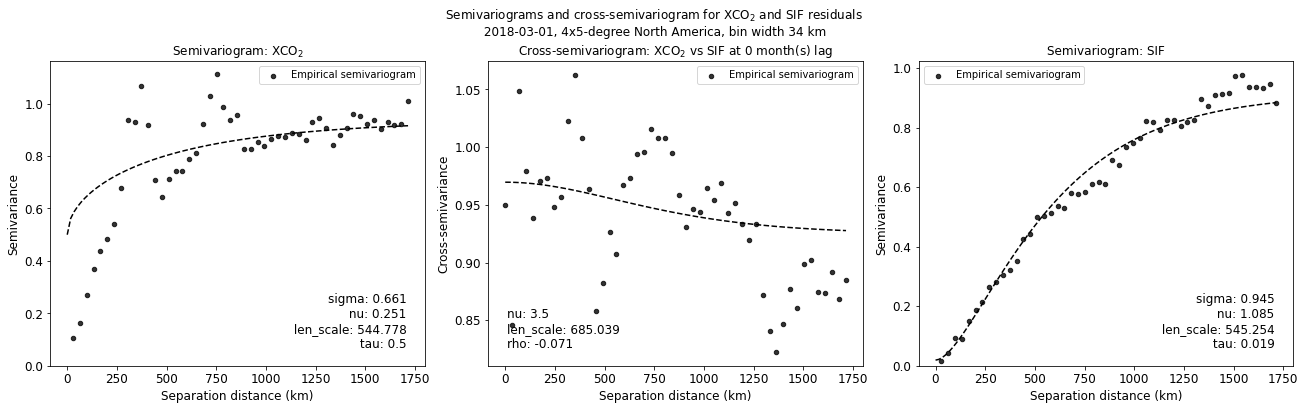

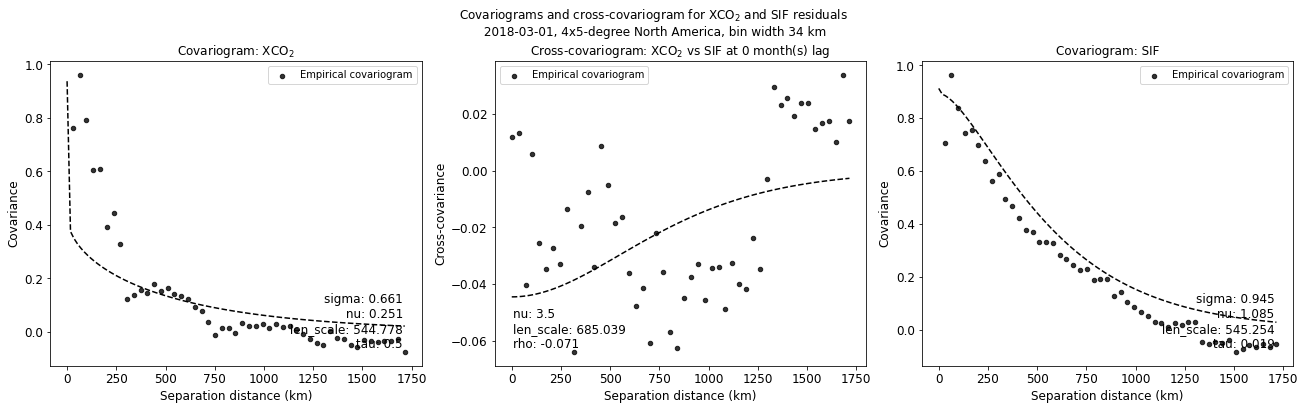

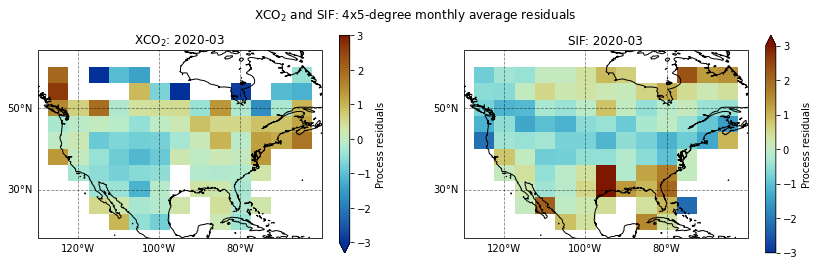

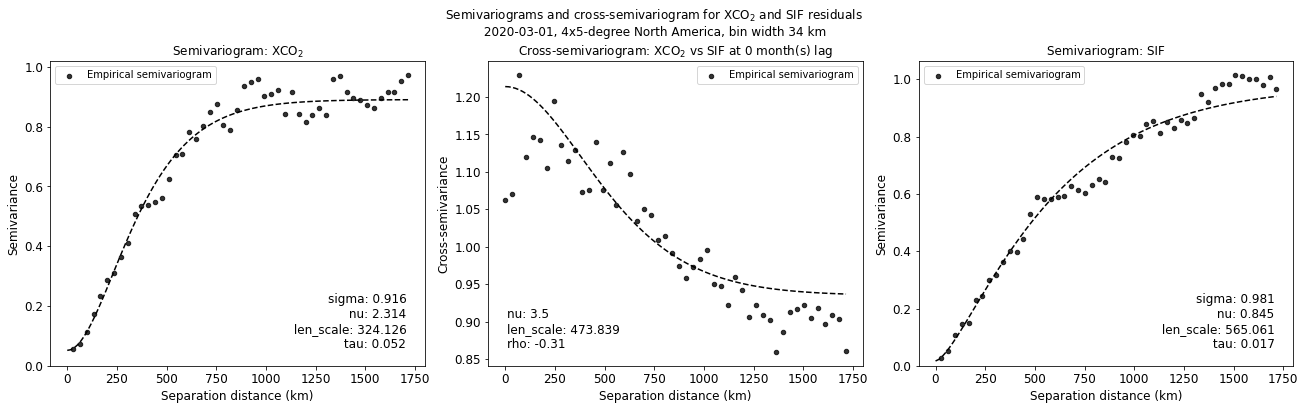

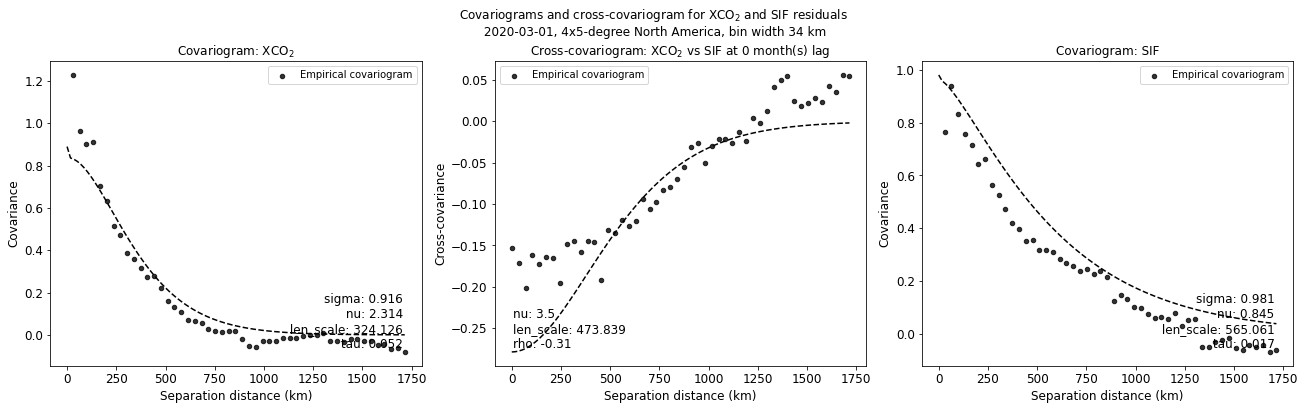

In [6]:
analyze_month(3)

## Summer (peak SIF / EVI season)
---

Month: 2016-08-01
Month: 2018-08-01
Month: 2020-08-01


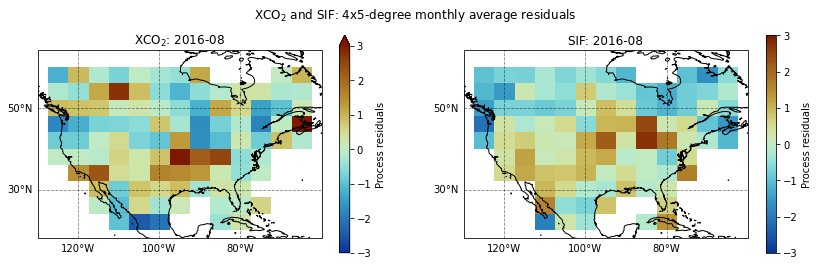

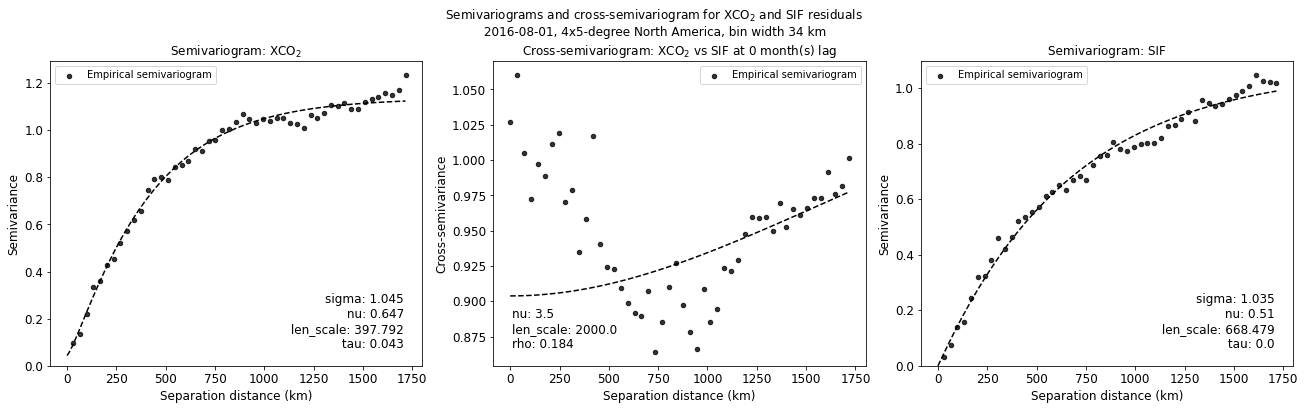

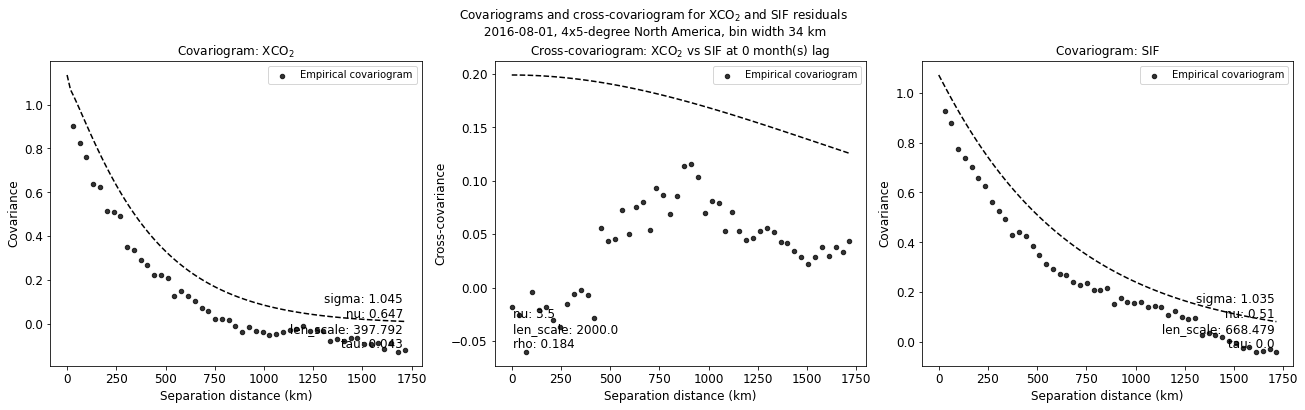

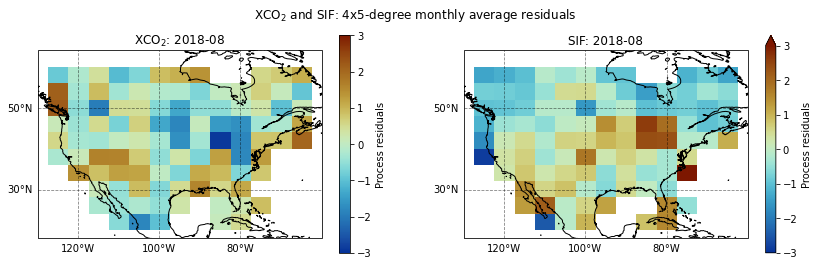

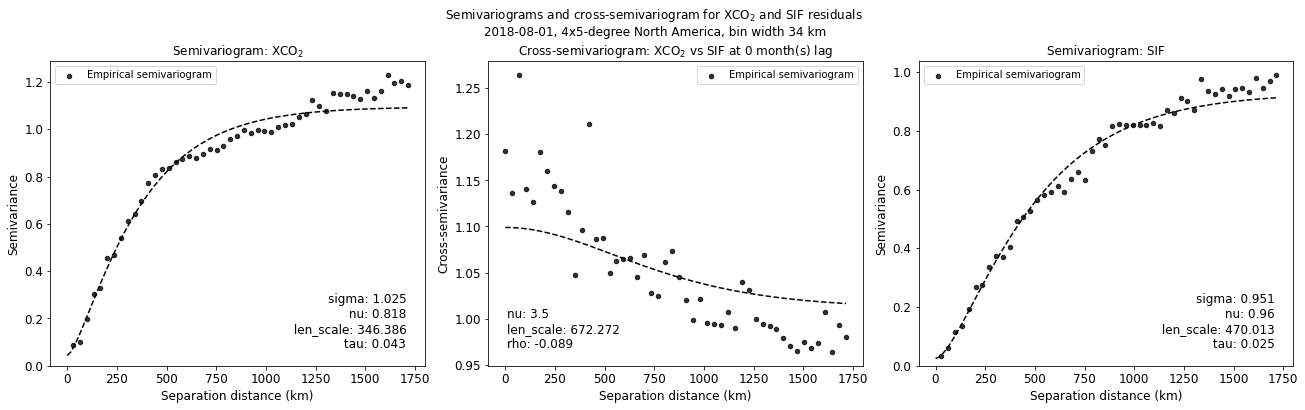

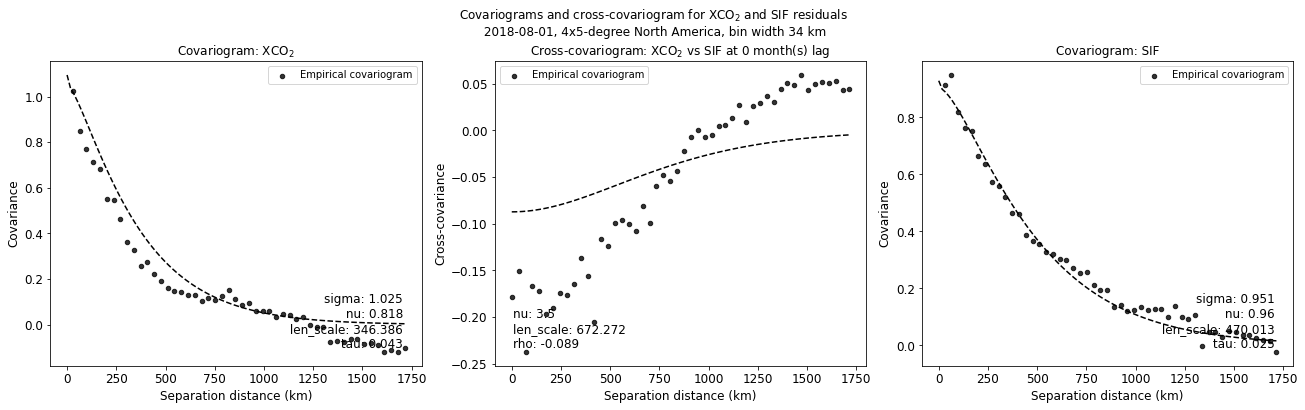

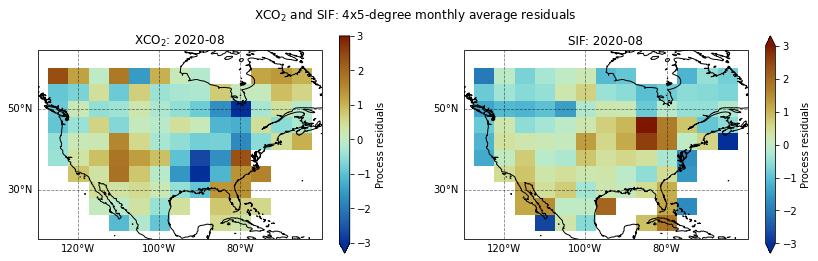

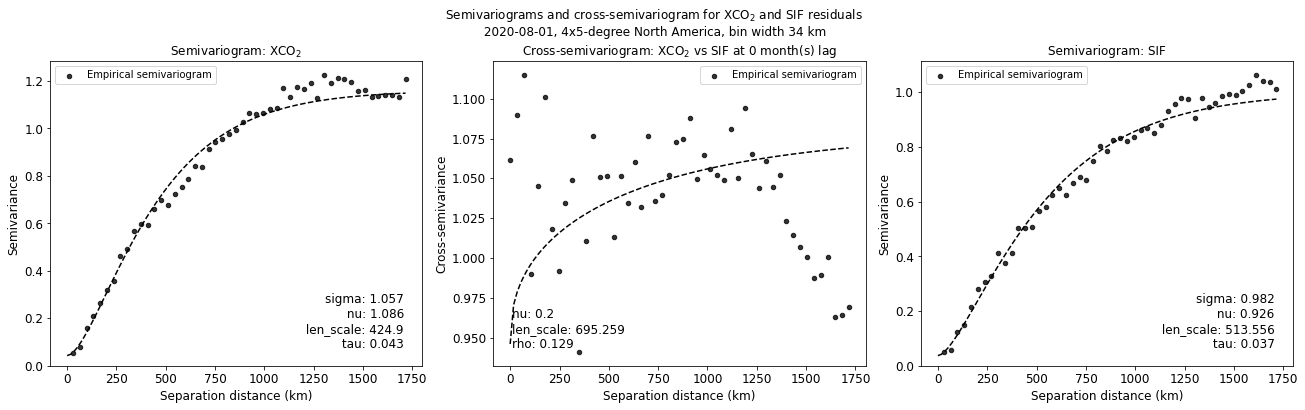

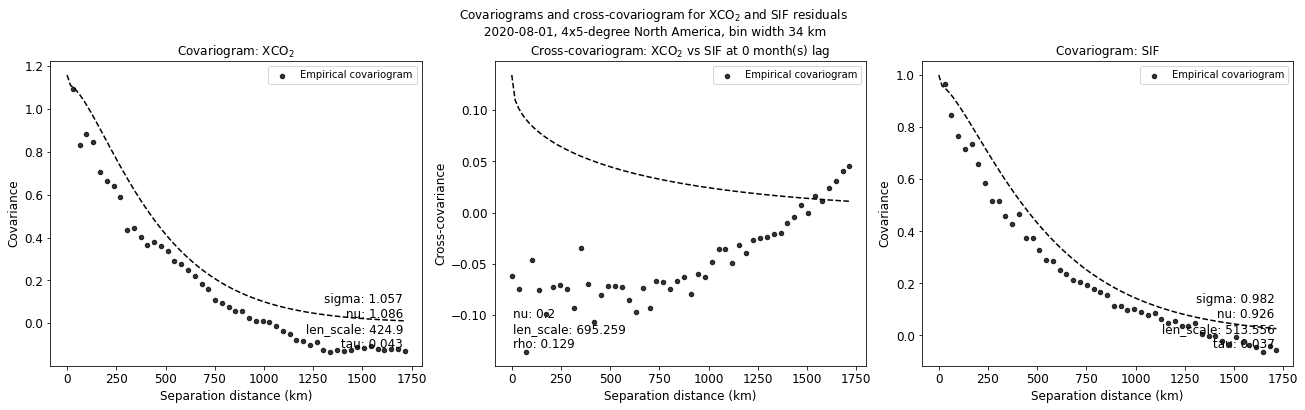

In [7]:
analyze_month(8)

## Late fall
---

Month: 2016-11-01
Month: 2018-11-01
Month: 2020-11-01


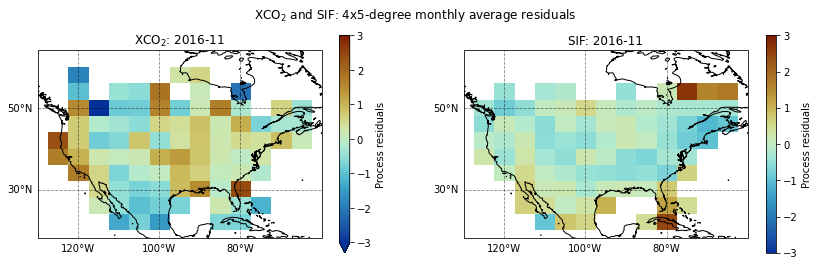

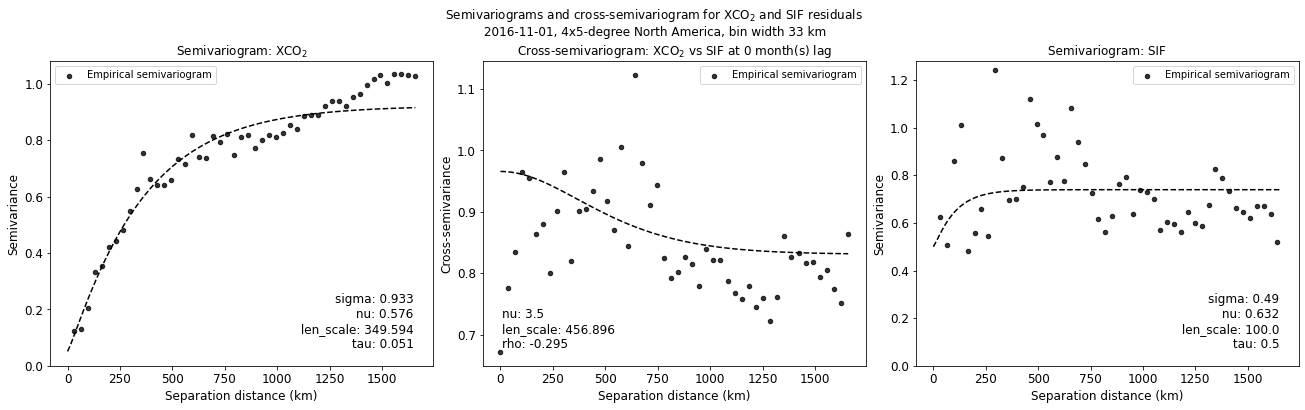

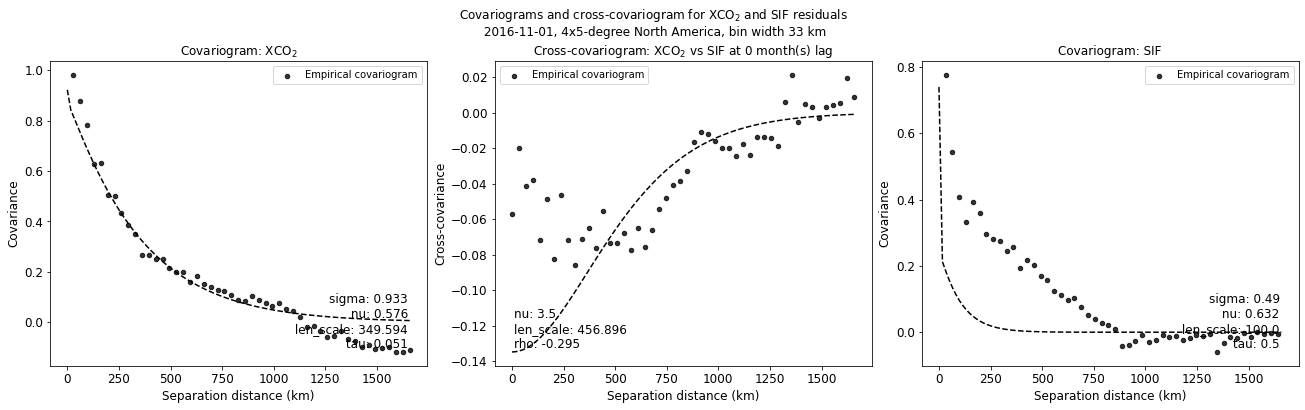

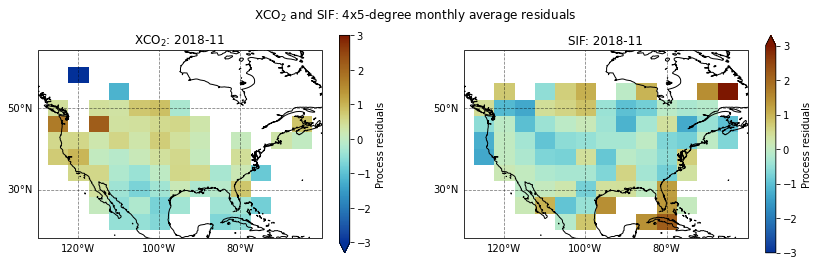

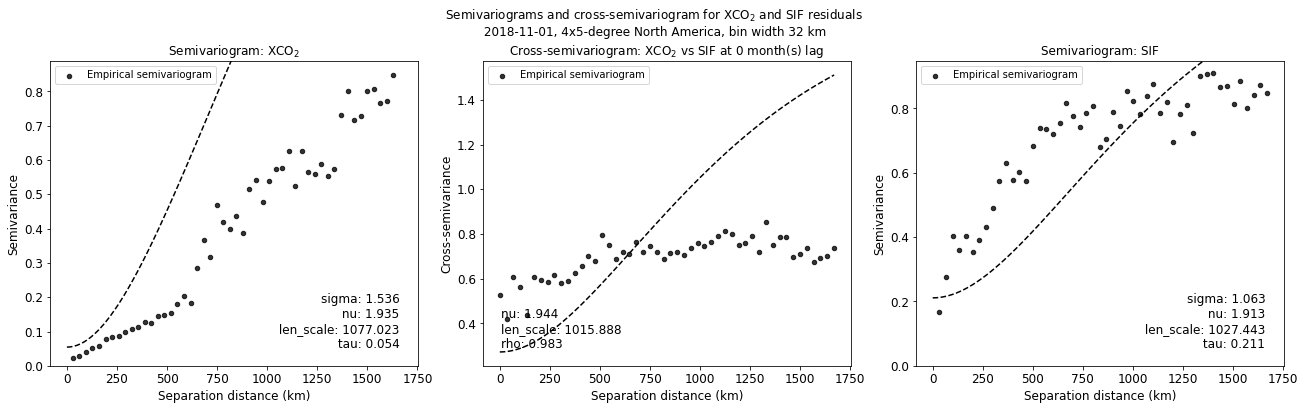

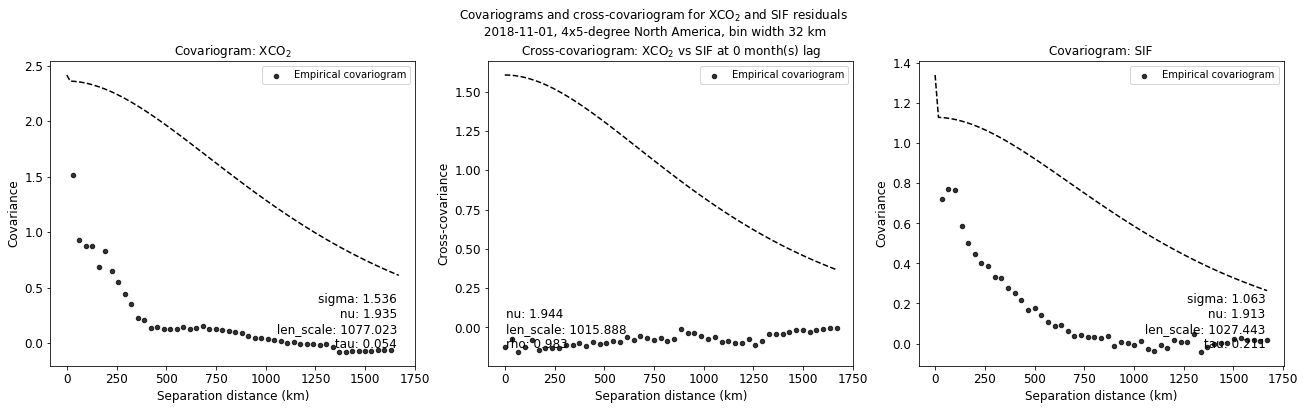

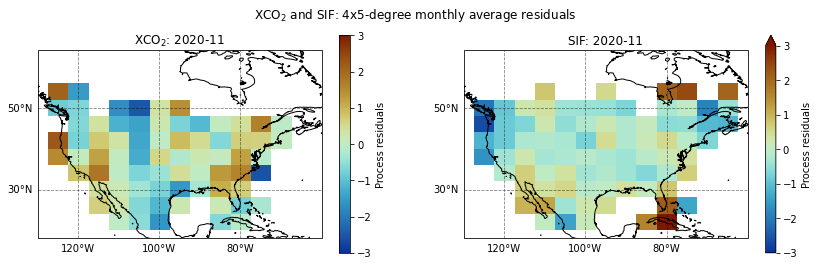

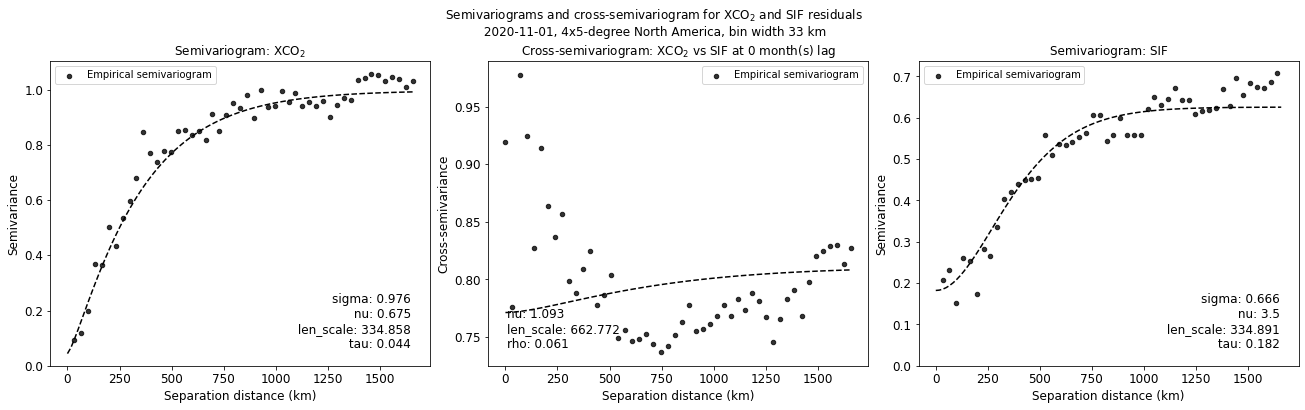

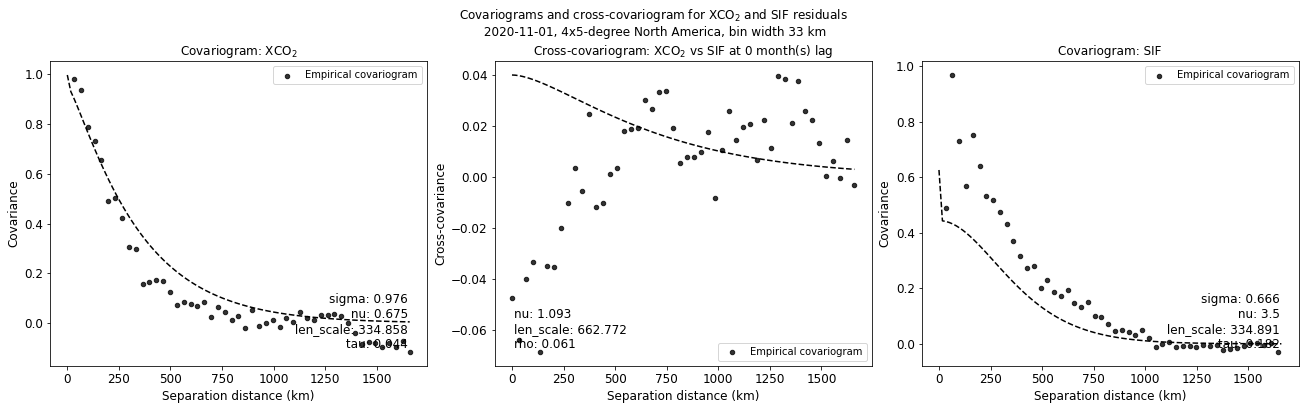

In [8]:
analyze_month(11)